In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from pandas import Series, DataFrame

In [4]:
import requests

In [5]:
from io import StringIO

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [8]:
sns.set_style("whitegrid")

In [9]:
%matplotlib inline

In [10]:
from datetime import datetime

In [11]:
'''
Data surrounding the 2012 U.S. Presidential Election will be used for this project. 
Questions asked will be things like:

    What was the party affiliation of the voters being polled? What impacts could 
    the undecided voters have had on the election results?

    Which candidate (Obama or Romney) were the poll results in favor of and did 
    sentiments change over time? Did candidate performance in the debates change 
    voter sentiment?

    How much was donated to campaigns? What were the average donations? How did 
    donations differ between parties or candidates? What were the demographics of 
    the donors? Were there any patterns in donation amounts? 

The two sources will be used for the data:

	the HuffPost Pollster: http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv

	and

	the Federal Election COmmission: http://www.fec.gov/finance/disclosure/ftp_download.shtml
'''

'\nData surrounding the 2012 U.S. Presidential Election will be used for this project. \nQuestions asked will be things like:\n\n    What was the party affiliation of the voters being polled? What impacts could \n    the undecided voters have had on the election results?\n\n    Which candidate (Obama or Romney) were the poll results in favor of and did \n    sentiments change over time? Did candidate performance in the debates change \n    voter sentiment?\n\n    How much was donated to campaigns? What were the average donations? How did \n    donations differ between parties or candidates? What were the demographics of \n    the donors? Were there any patterns in donation amounts? \n\nThe two sources will be used for the data:\n\n\tthe HuffPost Pollster: http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv\n\n\tand\n\n\tthe Federal Election COmmission: http://www.fec.gov/finance/disclosure/ftp_download.shtml\n'

In [12]:
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

source = requests.get(url).text

pollData = StringIO(source)

In [13]:
'''
Above, the object source was set to use the request function to retrieve the political information, 
read/interpreted as text, from HuffPost Pollster via the URL listed.

The pollData object was set to the StringIO function placed onto that source object to help avoid a 
StringIO error with Pandas.

Below, that pulled data will be set as a DataFrame (pollDataFrame) that will then read the poll data 
object (pollData).
'''

'\nAbove, the object source was set to use the request function to retrieve the political information, \nread/interpreted as text, from HuffPost Pollster via the URL listed.\n\nThe pollData object was set to the StringIO function placed onto that source object to help avoid a \nStringIO error with Pandas.\n\nBelow, that pulled data will be set as a DataFrame (pollDataFrame) that will then read the poll data \nobject (pollData).\n'

In [14]:
pollDataFrame = pd.read_csv(pollData)

In [15]:
pollDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 15 columns):
Pollster                  590 non-null object
Start Date                590 non-null object
End Date                  590 non-null object
Entry Date/Time (ET)      590 non-null object
Number of Observations    568 non-null float64
Population                590 non-null object
Mode                      590 non-null object
Obama                     590 non-null int64
Romney                    590 non-null int64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              590 non-null object
Source URL                588 non-null object
Partisan                  590 non-null object
Affiliation               590 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 69.2+ KB


In [16]:
pollDataFrame.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47,47,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None
1,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48,48,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None
2,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50,49,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None
3,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06T07:38:41Z,1041.0,Likely Voters,Internet,47,47,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48,49,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None


In [17]:
pollDataFrame.columns # … to check to see if there are any spaces at the beginning or end of the column names

Index(['Pollster', 'Start Date', 'End Date', 'Entry Date/Time (ET)',
       'Number of Observations', 'Population', 'Mode', 'Obama', 'Romney',
       'Undecided', 'Other', 'Pollster URL', 'Source URL', 'Partisan',
       'Affiliation'],
      dtype='object')

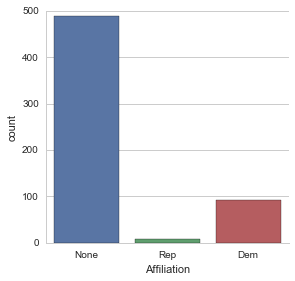

In [18]:
sns.factorplot("Affiliation", kind = "count", data = pollDataFrame)  # A quick visualization using seaborn

In [19]:
'''
The majority of the polls have no affiliation... creating a strong neutrality. There will 
probably be a lean towards the democrats in the aggregation of poll findings though, due 
to that affiliation being the second largest accoring to this factorplot.

Below the above will be replot to incorporate population data as a way to see, within the 
affiliations, which respondents were were likely voters, which respondents were registered 
voters, which respondents were likely voters who were Republican, and which respondents did 
not fit the other categories (and where thusly labeled as “Adults”).
'''

'\nThe majority of the polls have no affiliation... creating a strong neutrality. There will \nprobably be a lean towards the democrats in the aggregation of poll findings though, due \nto that affiliation being the second largest accoring to this factorplot.\n\nBelow the above will be replot to incorporate population data as a way to see, within the \naffiliations, which respondents were were likely voters, which respondents were registered \nvoters, which respondents were likely voters who were Republican, and which respondents did \nnot fit the other categories (and where thusly labeled as “Adults”).\n'

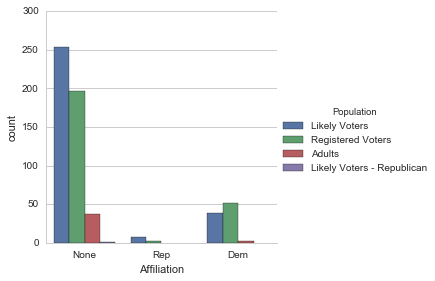

In [20]:
sns.factorplot("Affiliation", kind = "count", data = pollDataFrame, hue = "Population")

In [21]:
'''
There is a strong showing of likely voters and registered voters. The poll data may
be a good reflection of the sentiments of the populations polled. 

Below is the beginning of the work to have a look at the averages for Obama, Romney, 
and the polled undecided respondents. An object will be made for the averages (avg) 
by getting the current DataFrame being used (pollDataFrame) and taking the average 
of all of the values contained in it.
'''

'\nThere is a strong showing of likely voters and registered voters. The poll data may\nbe a good reflection of the sentiments of the populations polled. \n\nBelow is the beginning of the work to have a look at the averages for Obama, Romney, \nand the polled undecided respondents. An object will be made for the averages (avg) \nby getting the current DataFrame being used (pollDataFrame) and taking the average \nof all of the values contained in it.\n'

In [22]:
avg = pd.DataFrame(pollDataFrame.mean())

In [23]:
avg.drop("Number of Observations", axis = 0, inplace = True)

In [24]:
'''
Above, the "Number of Observations" column was dropped because its inclusion does not 
add to what is being looked for (i.e. - the averages of Obama, Romney, and Undecided).

Below, the standard deviations will be found using a similar method.
'''

'\nAbove, the "Number of Observations" column was dropped because its inclusion does not \nadd to what is being looked for (i.e. - the averages of Obama, Romney, and Undecided).\n\nBelow, the standard deviations will be found using a similar method.\n'

In [25]:
standardDev = pd.DataFrame(pollDataFrame.std())

In [26]:
standardDev.drop("Number of Observations", axis = 0, inplace = True)

In [27]:
standardDev.head()  # Checking what the standard deviations for the averages look like.

,0
Obama,2.447069
Romney,2.925320
Undecided,3.698614
Other,2.721318


In [28]:
# Next, Pandas' built-in plot will be used to plot this data and see the average sentiment of all of the polls.

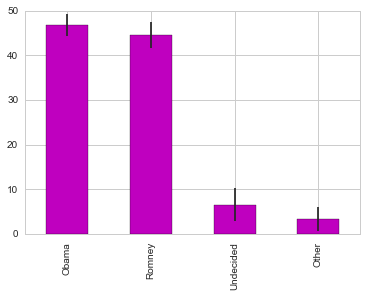

In [29]:
avg.plot(yerr = standardDev, kind = "bar", legend = False, color='m')

In [30]:
'''
The bar plot shows that both candidates were within standard deviations of each 
other. Since results were really close, the undecided voters then could make a 
big difference. With that being the case, it makes sense to look more closely at 
the undecided factor. The begin doing that below, a new DataFrame will be built 
that concatenates the two previous DataFrames.
'''

'\nThe bar plot shows that both candidates were within standard deviations of each \nother. Since results were really close, the undecided voters then could make a \nbig difference. With that being the case, it makes sense to look more closely at \nthe undecided factor. The begin doing that below, a new DataFrame will be built \nthat concatenates the two previous DataFrames.\n'

In [31]:
pollAvg = pd.concat([avg, standardDev], axis = 1) 

In [32]:
pollAvg.columns = ["Average", "Standard Dev"]  # This labels the columns

In [33]:
pollAvg

,Average,Standard Dev
Obama,46.774576,2.447069
Romney,44.572881,2.925320
Undecided,6.546099,3.698614
Other,3.400990,2.721318


In [34]:
'''
Again, the poll indicates that it was a fairly close race. With politics in general, 
neuroscience can help to make sense of how to interpret this data. From a 
neuroscience standpoint, it is safe to assume that [undecided voters WILL vote for one 
of the candidates (as opposed to not voting at all)](http://election.princeton.edu/2008/10/07/the-neuroscience-of-being-undecided).

With it being a safe assumption that most undecided voters are, indeed, likely vote for 
ONE of the candidates once elections occur, it is very likely that this very close election
was ultimately decided by respondents who had previously been undecided voters.

It would be interesting to look at how voter sentiment changed/evolved over time. That 
will be done with a quick time series analysis of voter sentiment by plotting 
Obama/Romney favor versus the poll end dates. 

Below, Pandas will be used to plot the favor of Obama, Romney, and Undecided voters over 
time (passed through a list in a way that adds those three data items to the y-axis).
'''

'\nAgain, the poll indicates that it was a fairly close race. With politics in general, \nneuroscience can help to make sense of how to interpret this data. From a \nneuroscience standpoint, it is safe to assume that [undecided voters WILL vote for one \nof the candidates (as opposed to not voting at all)](http://election.princeton.edu/2008/10/07/the-neuroscience-of-being-undecided).\n\nWith it being a safe assumption that most undecided voters are, indeed, likely vote for \nONE of the candidates once elections occur, it is very likely that this very close election\nwas ultimately decided by respondents who had previously been undecided voters.\n\nIt would be interesting to look at how voter sentiment changed/evolved over time. That \nwill be done with a quick time series analysis of voter sentiment by plotting \nObama/Romney favor versus the poll end dates. \n\nBelow, Pandas will be used to plot the favor of Obama, Romney, and Undecided voters over \ntime (passed through a list in a w

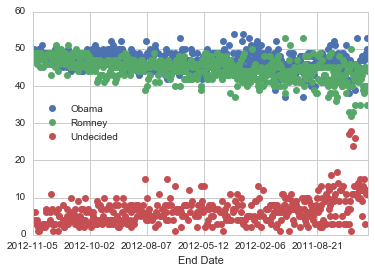

In [35]:
pollDataFrame.plot(x = "End Date", y = ["Obama", "Romney", "Undecided"], marker = 'o', linestyle = '') # No line

In [36]:
'''
From the plot above, it becomes apparent that the trend of undecided voters started 
to go down as the time got closer to the election date. This reading of sentiments 
over time indicates that decisions/choosing of one candidate among undecided voters 
were often made closer to the election date. Also, it shows that the amount of support 
for each candidate became more tied as time got closer to the election date as well.

The undecided voters can be removed to allow for plotting the difference between the 
two candidates over time in a more clean way. Below, a new column (Difference) will 
be created that isolates the differences (in percentage points, so support/100) 
between Obama support and Romney support.
'''

'\nFrom the plot above, it becomes apparent that the trend of undecided voters started \nto go down as the time got closer to the election date. This reading of sentiments \nover time indicates that decisions/choosing of one candidate among undecided voters \nwere often made closer to the election date. Also, it shows that the amount of support \nfor each candidate became more tied as time got closer to the election date as well.\n\nThe undecided voters can be removed to allow for plotting the difference between the \ntwo candidates over time in a more clean way. Below, a new column (Difference) will \nbe created that isolates the differences (in percentage points, so support/100) \nbetween Obama support and Romney support.\n'

In [37]:
pollDataFrame["Difference"] = (pollDataFrame.Obama - pollDataFrame.Romney)/100

In [38]:
pollDataFrame[0:1] # Checking for the new column

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47,47,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,0.0


In [39]:
pollDataFrame = pollDataFrame.groupby(["Start Date"], as_index = False).mean()

In [40]:
'''
Above, groupby was used to group the polls by their start date to allow them to then be 
sorted by "Start Date" (since multiple polls in the dataset have the same end date). The 
index was set to “False” to keep the current index (as opposed to allowing for the "Start 
Date" to serve as the index). Then the mean of the polls on a particular day was taken. 
'''

'\nAbove, groupby was used to group the polls by their start date to allow them to then be \nsorted by "Start Date" (since multiple polls in the dataset have the same end date). The \nindex was set to “False” to keep the current index (as opposed to allowing for the "Start \nDate" to serve as the index). Then the mean of the polls on a particular day was taken. \n'

In [41]:
pollDataFrame.head()  # ... to preview that

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,0.09


In [42]:
'''
With those things in place, it is now possible to start plotting the difference versus time. 
That plot will be done below.
'''

'\nWith those things in place, it is now possible to start plotting the difference versus time. \nThat plot will be done below.\n'

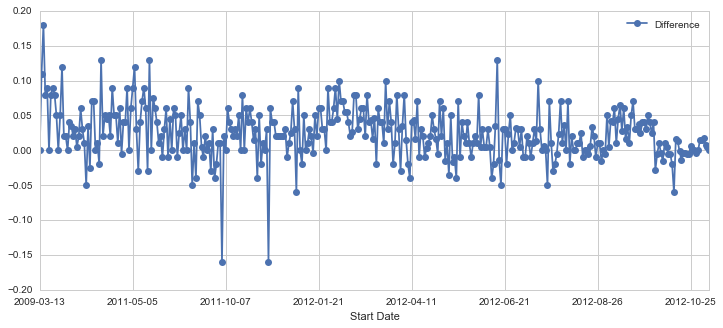

In [43]:
fig = pollDataFrame.plot("Start Date", "Difference", figsize = (12, 5), marker = "o", linestyle = "-")

In [44]:
'''
The “Difference” column was structured in a way that reads as Obama minus Romney. Which 
means that a positive difference indicates a leaning towards Obama in the polls, and a 
negative difference means a leaning towards Romney. 

The two long negative marks in approximately late 2011-09/early 2011-10 and approximately 
late 2011-10/early 2011-11 indicate that Romney scored big wins in the polls then. A way to 
get more details of those particular dates would be to use the minimum function to find the 
specific dates, then look back in the news for insights on what was happening that may have 
helped to trigger the spikes. 

One thing that is standard is that, there are certain dates that are particularly newsworthy 
during a Presidential campaign - the debate days. For the 2012 Presidential election, there 
were debates that happened on on October 3 (at U. of Denver), October 16 (at Hofstra U.), 
and October 22 (at Lynn U.). 

Next, to help with looking at that time period, some lines will be plotted as markers to 
allow for a zooming in on the one month when the Presidential debates took place (October 
2012).

The locations within the index that match up to that time period (the month of October in 
2012) need to be found before the xlimits can be set for the figure. To do that below, a 
simple for loop will be created. That will be done by setting a row index (0) then setting 
an empty list for the xlimit. 

This loop command will trigger a scan cycle where the index is gone through. And, for dates 
in pollDataFrame, if the first 7 terms of that start date are equal to 2012-10, the xlimit 
will be appended with the current row that was just found, then 1 will be added to its value. 
"Else" will keep the counter of the index row going if a row that fits the criteria is not 
found during the scan. Then, at the end, the minimum and maximum x values will be printed.

Following that, the voter sentiment during October, 2012 will be plotted and the debate dates 
will be highlighted.
'''

'\nThe “Difference” column was structured in a way that reads as Obama minus Romney. Which \nmeans that a positive difference indicates a leaning towards Obama in the polls, and a \nnegative difference means a leaning towards Romney. \n\nThe two long negative marks in approximately late 2011-09/early 2011-10 and approximately \nlate 2011-10/early 2011-11 indicate that Romney scored big wins in the polls then. A way to \nget more details of those particular dates would be to use the minimum function to find the \nspecific dates, then look back in the news for insights on what was happening that may have \nhelped to trigger the spikes. \n\nOne thing that is standard is that, there are certain dates that are particularly newsworthy \nduring a Presidential campaign - the debate days. For the 2012 Presidential election, there \nwere debates that happened on on October 3 (at U. of Denver), October 16 (at Hofstra U.), \nand October 22 (at Lynn U.). \n\nNext, to help with looking at that time 

In [45]:
row_in = 0
xlimit = []

for date in pollDataFrame["Start Date"]:
    if date[0:7] == "2012-10":
        xlimit.append([row_in])
        row_in += 1
    else:
        row_in += 1
        
print (min(xlimit))
print (max(xlimit)) # It turns out print min and max functions only work within parenthesis for Python 3.5

[329]
[356]


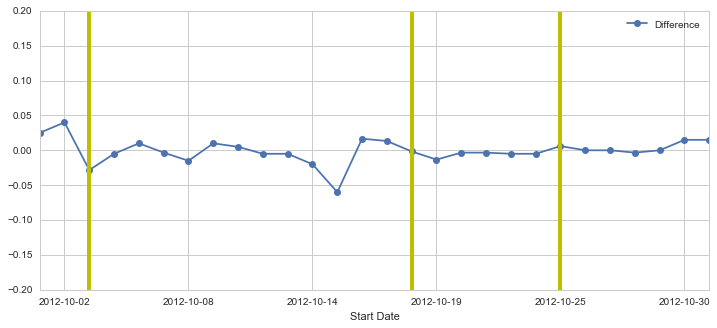

In [46]:
fig = pollDataFrame.plot("Start Date", "Difference", figsize = (12, 5), marker = "o", linestyle = "-", xlim = (329,356))

plt.axvline(x=329+2, linewidth = 4, color = "y"); # This highlights the October 3 debate
plt.axvline(x=329+15, linewidth = 4, color = "y"); # This highlights the October 16 debate
plt.axvline(x=329+21, linewidth = 4, color = "y"); # This highlights the October 22 debate

In [47]:
donorDataFrame = pd.read_csv("Election_Donor_Dataset.csv", low_memory = False)

In [48]:
donorDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [49]:
donorDataFrame.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [50]:
donorDataFrame.columns # … to check to see if there are any spaces at the beginning or end of the column names

Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num'],
      dtype='object')

In [51]:
donorDataFrame["contb_receipt_amt"].value_counts() # To check for the most common donation amount... which is $100

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 128.68          1
 60.71           1
 139.68          1
 143.43          1
 155.43          1
 160.93          1
 190.68          1
 195.18          1
 198.18          1
 62.46           1
 93.88           1
 101.88          1
 34.46           1
 25.96           1
 26.21           1
 28.96           1
 29.46           1
 30.46           1
 31.96           1
 33.71           1
 36.46           1
 54.71      

In [52]:
donorMean = donorDataFrame["contb_receipt_amt"].mean()  # To get the mean donation

In [53]:
donorStandard = donorDataFrame["contb_receipt_amt"].std() # To get the standard deviation

In [56]:
print ("The average donation was %.2f with a standard deviation of %.2f." %(donorMean, donorStandard)) # To display it

The average donation was 298.24 with a standard deviation of 3749.67.


In [57]:
# That's a rather large standard deviation! Well, when considering the amount of the average donation...

In [58]:
topDonor = donorDataFrame["contb_receipt_amt"].copy() # Series made from the DataFrame set to a copy (to allow sorting)

In [59]:
topDonor.sort_values()

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
33821       -5414.31
908565      -5115.00
456649      -5000.00
574657      -5000.00
30513       -5000.00
562267      -5000.00
30584       -5000.00
86268       -5000.00
708920      -5000.00
665887      -5000.00
708899      -5000.00
708929      -5000.00
21172       -5000.00
21168       -5000.00
21167       -5000.00
262328      -5000.00
946875      -5000.00
7361        -5000.00
416403      -5000.00
21164       -5000.00
707945      -5000.00
615101      -5000.00
7973        -5000.00
54430       -5000.00
54434       -5000.00
             ...    
708022      10000.00
708898      10000.00
710177      10000.00
876244      10000.00
709608      10000.00
708919      10000.00
709739      10000.00
91145       10000.00
708138      10000.00
993178      10000.00
709813      10000.00
710730      10000.00
708928      10000.00
709268      10000.00
99829       10000.00
90076       10000.00
709859      1

In [60]:
# The FEC keeps records of donation refund amounts. Those are the negative values in the results. 

In [61]:
topDonor = topDonor[topDonor > 0] # Since refund amounts didn't go to candidates, they'll be omitted.

In [62]:
topDonor.sort_values()

335573          0.01
335407          0.01
335352          0.01
324596          0.01
329896          0.01
318560          0.01
335100          0.01
318670          0.01
329984          0.01
335087          0.01
335033          0.01
330220          0.01
330222          0.01
324283          0.01
324170          0.01
334913          0.01
334899          0.01
323823          0.01
324778          0.01
323822          0.01
324838          0.01
324876          0.01
336020          0.01
317634          0.01
325344          0.01
335767          0.01
317753          0.01
325153          0.01
325151          0.01
350626          0.01
             ...    
710177      10000.00
709608      10000.00
99829       10000.00
711167      10000.00
993178      10000.00
710198      10000.00
708928      10000.00
708022      10000.00
709739      10000.00
709859      10000.00
709813      10000.00
708919      10000.00
708138      10000.00
876244      10000.00
91145       10000.00
708898      10000.00
710730      1

In [65]:
topDonor.value_counts().head(10) # Amounts of the 10 most common donations

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

In [66]:
# Will create a histogram of the most common amounts.

In [67]:
tenMost = topDonor[topDonor < 2500] #... because $2,500 was the peak value in the 10 most common donation amounts.

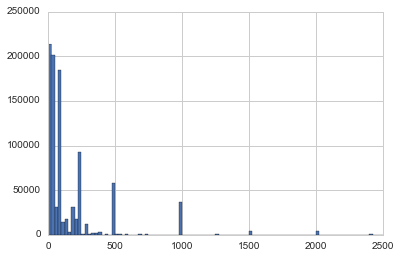

In [68]:
tenMost.hist(bins = 100)

In [69]:
# Peaks exist at round-number values, giving a sense that the donors were more inclined to donate at round-number values.

In [70]:
'''
Next comes the task of seeing how  donations can be separated by party. To start, a new 
“Party” column will be created that takes in a list of the candidates and their party 
affiliations. This will be done by isolating the unique values contained.
 '''

'\nNext comes the task of seeing how  donations can be separated by party. To start, a new \n“Party” column will be created that takes in a list of the candidates and their party \naffiliations. This will be done by isolating the unique values contained.\n '

In [71]:
candidates = donorDataFrame.cand_nm.unique()

In [72]:
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [73]:
'''
Barak Obama is the only democratic candidate that the lists returns. Eliminating his name
leaves only the names of the Republican candidates (not counting the fact that Gary Johnson 
later switched affiliations to run as a candidate for the Libertarian party), but that is 
not immediately apparent by looking at the array.

Next, to increase clarity and also to segment the information even further, a column will 
be created to group candidates by party affiliation. A dictionary will be made and a map too 
as a way to organize the names for the new party affiliation column.
'''

'\nBarak Obama is the only democratic candidate that the lists returns. Eliminating his name\nleaves only the names of the Republican candidates (not counting the fact that Gary Johnson \nlater switched affiliations to run as a candidate for the Libertarian party), but that is \nnot immediately apparent by looking at the array.\n\nNext, to increase clarity and also to segment the information even further, a column will \nbe created to group candidates by party affiliation. A dictionary will be made and a map too \nas a way to organize the names for the new party affiliation column.\n'

In [74]:
partyMap = {"Bachmann, Michelle": "Republican",
           "Cain, Herman": "Republican",
           "Gingrich, Newt": "Republican",
           "Huntsman, Jon": "Republican",
           "Johnson, Gary Earl": "Republican",
           "McCotter, Thaddeus G": "Republican",
           "Obama, Barack": "Democrat",
           "Paul, Ron": "Republican",
           "Pawlenty, Timothy": "Republican",
           "Perry, Rick": "Republican",
           "Roemer, Charles E. 'Buddy' III": "Republican",
           "Romney, Mitt": "Republican",
           "Santorum, Rick": "Republican"}

In [75]:
donorDataFrame["Party"] = donorDataFrame.cand_nm.map(partyMap)

In [76]:
'''
A for loop could have been used to achieve the same result as mapping above. 
Below is how that could have looked.

for i in range (0, len(donorDataFrame)):
        if donorDataFrame["cand_nm"][i] == "Obama, Barack":
            donorDataFrame["Party"][i] = "Democrat"
        else:
            donorDataFrame["Party"][i] = "Republican"
            
'''

'\nA for loop could have been used to achieve the same result as mapping above. \nBelow is how that could have looked.\n\nfor i in range (0, len(donorDataFrame)):\n        if donorDataFrame["cand_nm"][i] == "Obama, Barack":\n            donorDataFrame["Party"][i] = "Democrat"\n        else:\n            donorDataFrame["Party"][i] = "Republican"\n            \n'

In [77]:
donorDataFrame = donorDataFrame[donorDataFrame.contb_receipt_amt > 0]

In [78]:
donorDataFrame.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [79]:
'''
Above is a check to see if refunds (negative amounts) were cleared from the donation 
figures. Also seeing if the Party column was added.
'''

'\nAbove is a check to see if refunds (negative amounts) were cleared from the donation \nfigures. Also seeing if the Party column was added.\n'

In [80]:
donorDataFrame.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [81]:
'''
Above, a groupby was done on the DataFrame by candidate names (cand_nm). Then, the 
contribution receipt column was set to display to then have the count method run on it 
(counting how many individual donors gave contributions to each of the candidates).

A similar process will be done below to display the dollar amounts of the contributions.
'''

'\nAbove, a groupby was done on the DataFrame by candidate names (cand_nm). Then, the \ncontribution receipt column was set to display to then have the count method run on it \n(counting how many individual donors gave contributions to each of the candidates).\n\nA similar process will be done below to display the dollar amounts of the contributions.\n'

In [82]:
donorDataFrame.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [83]:
'''
Below, a for loop will then print out a statement for each candidate's donation amount. 
The candidate names are the index of the groupby series object, and the loop commands 
that they are to be called individually then print a line of text that shows the 
candidate names and the donation amounts in dollars.
'''

"\nBelow, a for loop will then print out a statement for each candidate's donation amount. \nThe candidate names are the index of the groupby series object, and the loop commands \nthat they are to be called individually then print a line of text that shows the \ncandidate names and the donation amounts in dollars.\n"

In [84]:
candAmount = donorDataFrame.groupby("cand_nm")["contb_receipt_amt"].sum()

i = 0

for don in candAmount:
    print ("The candidate %s raised %.0f dollars." %(candAmount.index[i], don))
    print ('\n')
    i += 1

The candidate Bachmann, Michelle raised 2711439 dollars.


The candidate Cain, Herman raised 7101082 dollars.


The candidate Gingrich, Newt raised 12832770 dollars.


The candidate Huntsman, Jon raised 3330373 dollars.


The candidate Johnson, Gary Earl raised 566962 dollars.


The candidate McCotter, Thaddeus G raised 39030 dollars.


The candidate Obama, Barack raised 135877427 dollars.


The candidate Paul, Ron raised 21009620 dollars.


The candidate Pawlenty, Timothy raised 6004819 dollars.


The candidate Perry, Rick raised 20305754 dollars.


The candidate Roemer, Charles E. 'Buddy' III raised 373010 dollars.


The candidate Romney, Mitt raised 88335908 dollars.


The candidate Santorum, Rick raised 11043159 dollars.




In [85]:
# Below uses the same object to present the same information graphically …

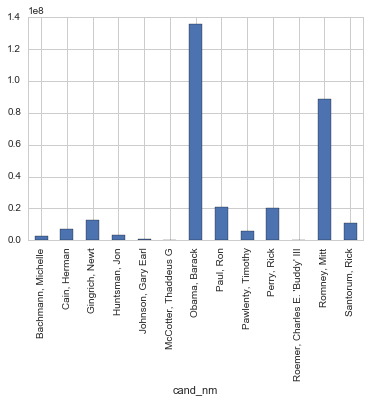

In [86]:
candAmount.plot(kind = "bar")

In [87]:
'''
Below will be a groupby of the donor DataFrame to begin a comparison of donations by 
party. Then there will be the display of a bar plot to visually compare the sum amount 
of the democratic campaign donations to the sum amount of republican campaign donations.
'''

'\nBelow will be a groupby of the donor DataFrame to begin a comparison of donations by \nparty. Then there will be the display of a bar plot to visually compare the sum amount \nof the democratic campaign donations to the sum amount of republican campaign donations.\n'

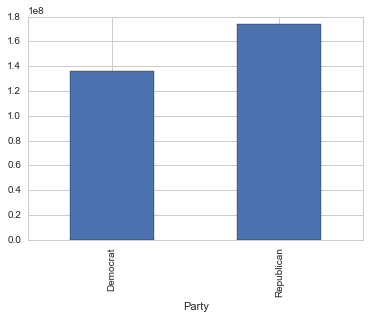

In [88]:
donorDataFrame.groupby("Party")['contb_receipt_amt'].sum().plot(kind = "bar")

In [89]:
'''
It would be interesting to look at the donation data from a different perspective - seeing 
who donated, and also seeing trends in who donated to which party. The dataset allows for 
see the occupations of the donors. A pivot table could be used to extract and organize the 
data.

An overview of the process for doing that is  the occupation information will be taken in 
from the donor DataFrame. Then, a pivot table will be used to make the index defined by the 
many different occupations and then have the columns defined by the party affiliation 
(either Republican or Democrat). Then, at the end, an aggregation function will be passed 
into the pivot table. In this case, it will just be a simple sum function and for adding up 
the contributions by individuals of the same occupation.

Below, that process will begin by making an occupation DataFrame. The donor DataFrame will 
be used for the information and a pivot table will be called to grab contribution amounts 
(via the receipt amount column). The index will be set equal to the contributors’ occupation. 
The column of focus will be the party affiliation column, so that one will be isolated in the 
pivot table. 
'''

'\nIt would be interesting to look at the donation data from a different perspective - seeing \nwho donated, and also seeing trends in who donated to which party. The dataset allows for \nsee the occupations of the donors. A pivot table could be used to extract and organize the \ndata.\n\nAn overview of the process for doing that is  the occupation information will be taken in \nfrom the donor DataFrame. Then, a pivot table will be used to make the index defined by the \nmany different occupations and then have the columns defined by the party affiliation \n(either Republican or Democrat). Then, at the end, an aggregation function will be passed \ninto the pivot table. In this case, it will just be a simple sum function and for adding up \nthe contributions by individuals of the same occupation.\n\nBelow, that process will begin by making an occupation DataFrame. The donor DataFrame will \nbe used for the information and a pivot table will be called to grab contribution amounts \n(via 

In [90]:
occuDataFrame = donorDataFrame.pivot_table("contb_receipt_amt",
                                index = "contbr_occupation",
                                columns = "Party", aggfunc = "sum")

In [91]:
occuDataFrame.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [92]:
occuDataFrame.shape # To get a sense of how big this DataFrame is

(45067, 2)

In [93]:
'''
The DataFrame is MASSIVE, making it far too large to display effectively using a small, 
static visualization. It would be useful to instead have a cutoff amount, one that is 
chosen based on the likelihood of having an impact. $1,000,000 is likely an impactful 
cumulative amount. Below is a look at which occupations, as a group, contributed more 
than $1,000,000 in total.
'''

'\nThe DataFrame is MASSIVE, making it far too large to display effectively using a small, \nstatic visualization. It would be useful to instead have a cutoff amount, one that is \nchosen based on the likelihood of having an impact. $1,000,000 is likely an impactful \ncumulative amount. Below is a look at which occupations, as a group, contributed more \nthan $1,000,000 in total.\n'

In [94]:
occuDataFrame = occuDataFrame[occuDataFrame.sum(1) > 1000000]

In [95]:
occuDataFrame.shape

(31, 2)

In [96]:
'''
Checking the shape above relays that there were 31 occupations for which members donated 
a cumulative amount of at least $1,000,000. 31 items is a more manageable list. This pruned 
list will be plotted below to show a visualization of how much members of the 31 remaining 
occupations donated as a group.
'''

'\nChecking the shape above relays that there were 31 occupations for which members donated \na cumulative amount of at least $1,000,000. 31 items is a more manageable list. This pruned \nlist will be plotted below to show a visualization of how much members of the 31 remaining \noccupations donated as a group.\n'

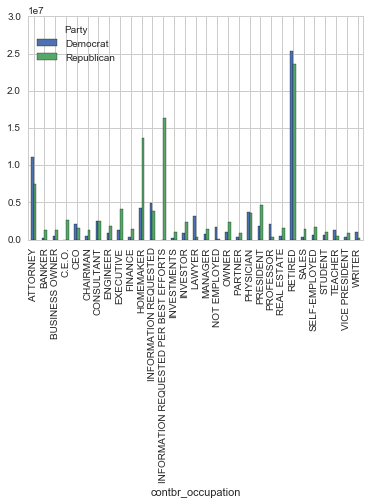

In [97]:
occuDataFrame.plot(kind = "bar")

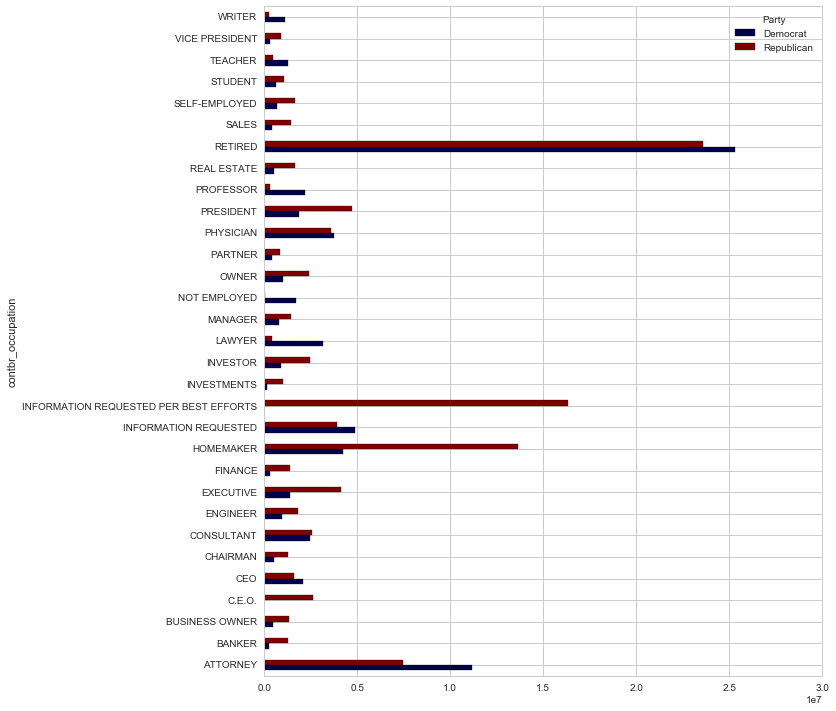

In [98]:
occuDataFrame.plot(kind = "barh", figsize = (10, 12), cmap = "seismic")

In [99]:
# Changed above to a horizontal orientation to improve readability.

In [100]:
occuDataFrame.drop(["INFORMATION REQUESTED PER BEST EFFORTS", "INFORMATION REQUESTED"], axis = 0, inplace = True)

In [101]:
'''
“Information requested…” rows can be treated as null values because they do not add to the 
clarity. They do not help with being able to gauge which occupations donated. As such, they 
were omitted above.
'''

'\n“Information requested…” rows can be treated as null values because they do not add to the \nclarity. They do not help with being able to gauge which occupations donated. As such, they \nwere omitted above.\n'

In [102]:
occuDataFrame.loc["CEO"] = occuDataFrame.loc["CEO"] + occuDataFrame.loc["C.E.O."]

In [103]:
# Combined CEO and C.E.O above because both rows are the same occupation.

In [104]:
occuDataFrame.drop('C.E.O.', inplace = True)

In [105]:
# "intrue" above made it a permanent affect in the DataFrame.

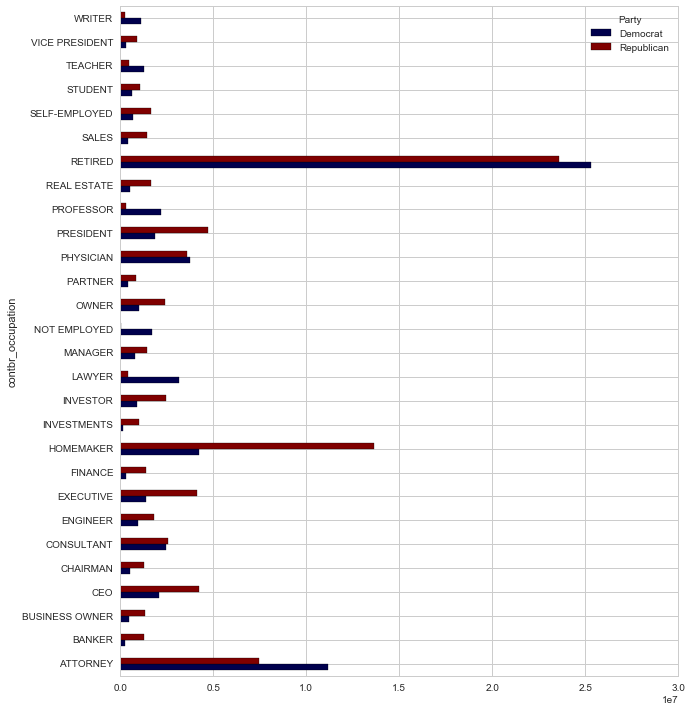

In [106]:
occuDataFrame.plot(kind = "barh", figsize = (10, 12), cmap = "seismic") # To replot after the update